# Quality Control Overview

In this tutorial, we will look through some of the tutorial of the FNGS pipeline, and discuss the relevance/importance of each metric as it immediately pertains to determining the quality of fMRI processing. As part of the FNGS pipeline, we provide step by step quality control, to not only ensure that the pipeline is robust, but also to make debugging issues in the pipeline far easier to find, as we can simply check the quality control to find steps where analysis performs poorly.

## Preprocessing Quality
Preprocessing of fMRI volumes for the FNGS pipeline is accomplished with mcflirt, a tool provided as part of FSL. We obtain shifts in the x, y, and z directions, both translational and rotational, as these are the only shifts in our image that we would expect for a subject's brain drifting in space throughout the course of a study (there is no change in size, as the head being scanned is the same regardless of its position, so we do not need any affine transformation). 

### Motion Parameters
First, we look at the motion parameters produced by mcflirt. We have both translational (x, y, and z) parameters, as well as rotational (x, y, and z) to cosider. First, we look at the rotational and translational motion parameters. Second, we consider overall motion, both absolute and relative. Absolute motion is defined as the total euclidian deviation from the zeroth timestep, whereas relative defines the distance from each timestep to its previous. Here, we want to be verifying that we do not have any sudden motions (indicated by significant spikes) as these could lead to signal dropout:

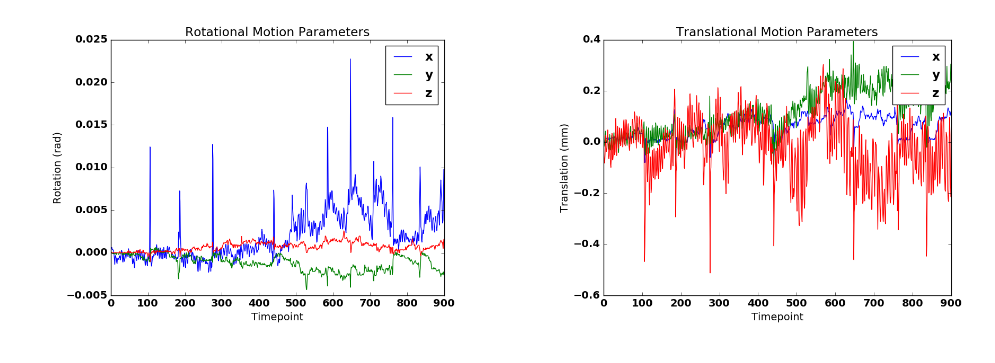

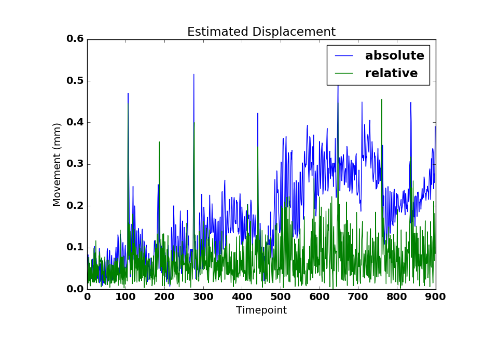

In [65]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

rot=mpimg.imread('overall/NKI_0021001_1_rest_rot_mc.png')
trans=mpimg.imread('overall/NKI_0021001_1_rest_trans_mc.png')
overall = mpimg.imread('overall/NKI_0021001_1_rest_disp_mc.png')

fmotion1 = plt.figure(figsize=(12, 8))
fmotion2 = plt.figure(figsize=(6, 4))

axrot = fmotion1.add_subplot(1, 2, 1)
axtrans = fmotion1.add_subplot(1,2,2)
axoverall = fmotion2.add_subplot(1,1,1)

axrot.imshow(rot)
axtrans.imshow(trans)
axoverall.imshow(overall)
axrot.axis('off')
axtrans.axis('off')
axoverall.axis('off')
fmotion1.show()
fmotion2.show()

### Alignment Metric
We align to the zeroth slice, so what we want to look for with our preprocessing here is to compare the quality of alignment before and after motion correction to the zeroth slice of each slice in the brain. We measure similarity with the mean squared error, where a smaller error indicates that our images have better alignment of higher activation regions, which typically would be associated with high white matter alignment (for all alignment comparisons hereafter, the MSE is taken between images normalized by their maximum values, such that all intensities are normalized between 0 and 1). Below, we provide two ways to compare the alignment quality before and after motion correction; in the jitter plot, we show a single point per axial slice per time point, in the kernel density estimate, we see the distribution of mean squared errors (this distribution is over all of the points of our jitter plot). As we can see, the MSE improves slightly after motion correction, which is about what we might expect. 

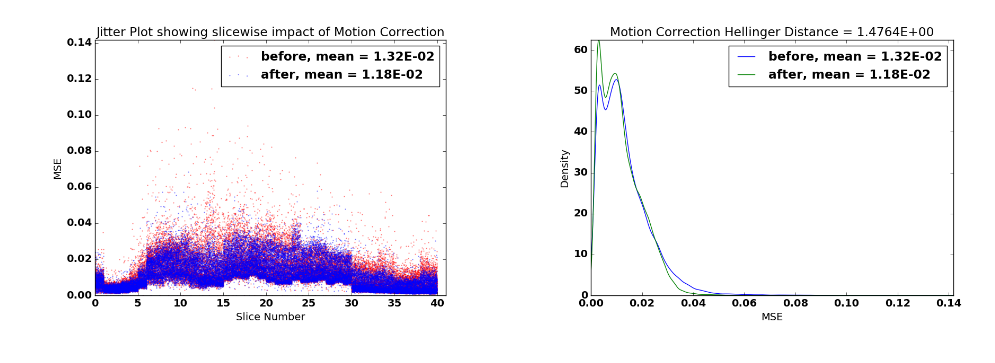

In [63]:
jitter=mpimg.imread('mc/NKI_0021001_1_rest_jitter.png')
kde=mpimg.imread('mc/NKI_0021001_1_rest_kde.png')

fmotion3 = plt.figure(figsize=(12, 8))
axjit = fmotion3.add_subplot(1, 2, 1)
axkde = fmotion3.add_subplot(1, 2, 2)

axjit.imshow(jitter)
axkde.imshow(kde)
axjit.axis('off')
axkde.axis('off')
fmotion3.show()

## Registration Quality

### Registration Metric

Next, we want to determine the effectiveness of our registration. Similar to the motion correction plots, we compute the axial slice-wise MSE between each axial slice per time point and that of the atlas we are registering to. 

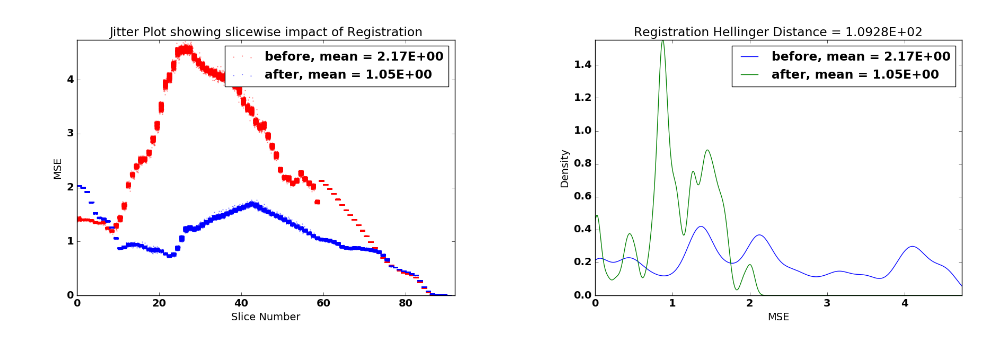

In [64]:
jitter=mpimg.imread('reg/NKI_0021001_1_rest_preproc_jitter.png')
kde=mpimg.imread('reg/NKI_0021001_1_rest_preproc_kde.png')

freg1 = plt.figure(figsize=(12, 8))
axjit = freg1.add_subplot(1, 2, 1)
axkde = freg1.add_subplot(1, 2, 2)

axjit.imshow(jitter)
axkde.imshow(kde)
axjit.axis('off')
axkde.axis('off')
freg1.show()

### Registration Figures

In these figures, we look at different figures to give us a sense of the quality of our alignment. We compare scans using one white image and one orange image, and a proper alignment will have a relatively homogeneous coloring (and therefore no purely orange or purely white components sticking out).

First we show the fMRI aligned image (mean over time points per voxel, the orange image) overlaid with the atlas (white):

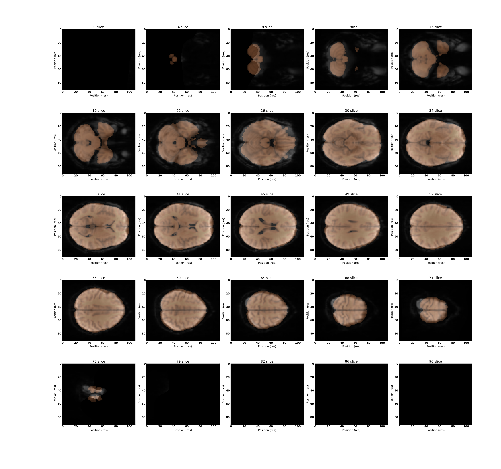

In [61]:
reg=mpimg.imread('overall/NKI_0021001_1_rest_mean_mni.png')

freg2 = plt.figure(figsize=(12, 8))

axreg = freg2.add_subplot(1, 2, 1)
axreg.imshow(reg)
axreg.axis('off')
freg2.show()


Next, we look at the anatomical image (orange) overlaid with the atlas (white):

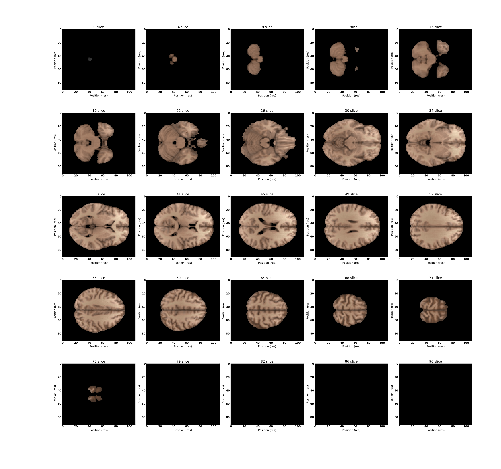

In [60]:
reg=mpimg.imread('overall/NKI_0021001_1_rest_anat_mni.png')

freg3 = plt.figure(figsize=(12, 8))

axreg = freg3.add_subplot(1, 2, 1)
axreg.imshow(reg)
axreg.axis('off')
freg3.show()

And finally, we look at our fMRI image (orange) overlaid with our anatomical image (white):

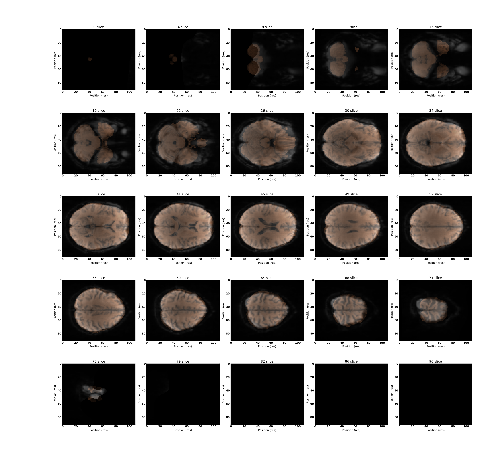

In [59]:
reg=mpimg.imread('overall/NKI_0021001_1_rest_mean_anat.png')

freg4 = plt.figure(figsize=(12, 8))

axreg = freg4.add_subplot(1, 2, 1)
axreg.imshow(reg)
axreg.axis('off')
freg4.show()

## Timeseries Extraction

Here, we provide a few figures to make sure your label file is in the same space which the brain was registered to. Failure to have brains at the same resolution or brainspace could lead to catastrophic issues with extracting timeseries.

First, we show the labelled ROI file (orange) overlaid with the mean resting state fMRI image:

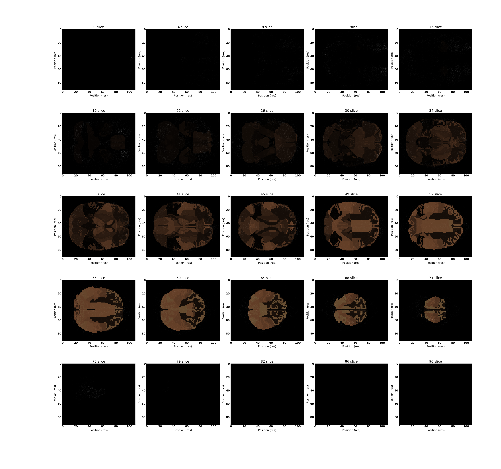

In [66]:
roi=mpimg.imread('roi/NKI_0021001_1_rest_Talairach_2mm_overlap.png')

fts1 = plt.figure(figsize=(12, 8))

axts = fts1.add_subplot(1, 2, 1)
axts.imshow(roi)
axts.axis('off')
fts1.show()

And with the the labelled ROI file (orange) overlaid with the reference atlas:

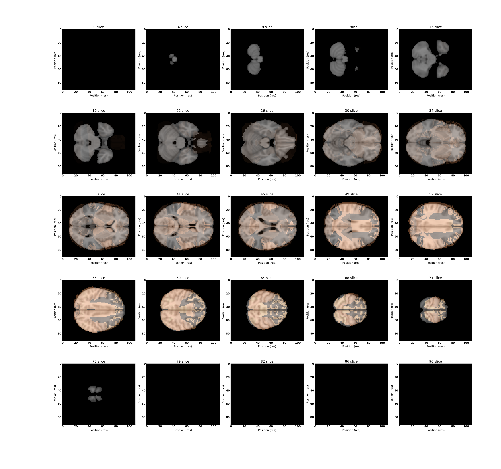

In [67]:
roi=mpimg.imread('roi/MNI152_T1_2mm_Talairach_2mm_overlap.png')

fts2 = plt.figure(figsize=(12, 8))

axts = fts2.add_subplot(1, 2, 1)
axts.imshow(roi)
axts.axis('off')
fts2.show()

## Overall Scan Quality

Finally, we look into some general metrics that are standard practice in the field. The majority of these metrics were developed by Harvard's [Center for Brain Science](http://cbs.fas.harvard.edu/science/core-facilities/neuroimaging/information-investigators/qc) and [CPAC](https://fcp-indi.github.io/), and adapted for use with FNGS. The brain images we show below are taken over the motion corrected and realigned brains for each participant (note that we perform this step prior to nuisance correction). 

### Voxelwise Information

First, we look at the mean standard deviation:

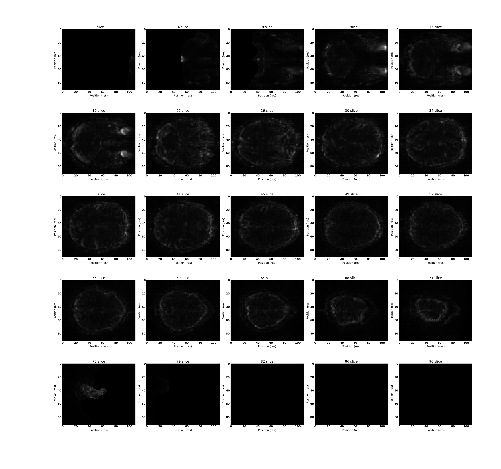

In [69]:
mean=mpimg.imread('overall/NKI_0021001_1_rest_std.png')

fov = plt.figure(figsize=(12, 8))

axov = fov.add_subplot(1, 2, 1)
axov.imshow(mean)
axov.axis('off')
fov.show()

Next, we have the signal to noise ratio, where we define the signal to noise ratio as the quotient between the mean image (above, shown in the registration section) and the standard deviation. Here, we generally want to have a high signal to noise ratio, as a low signal to noise ratio can often be indicative of a scanner issue or an issue running the pipeline:

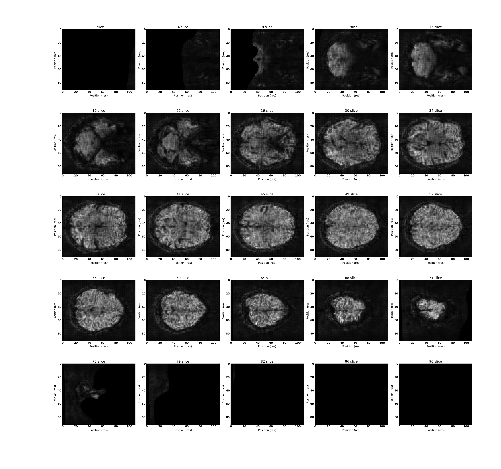

In [70]:
mean=mpimg.imread('overall/NKI_0021001_1_rest_snr.png')

fov = plt.figure(figsize=(12, 8))

axov = fov.add_subplot(1, 2, 1)
axov.imshow(mean)
axov.axis('off')
fov.show()

### Voxel Statistics

Our final few plots concern voxel statistics. First, we want to check our slice intensities. We average all of the voxels for each slice in the image, and the goal is that the average intensities are relatively consistent as we proceed in time. We show a single line for each axial slice:

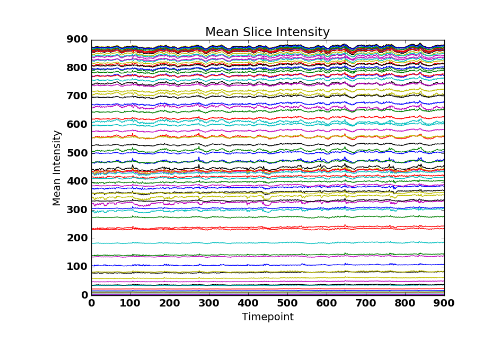

In [71]:
intens=mpimg.imread('overall/NKI_0021001_1_rest_slice_intens.png')

fintens = plt.figure(figsize=(12, 8))

axvox = fintens.add_subplot(1, 2, 1)
axvox.imshow(intens)
axvox.axis('off')
fintens.show()

Next, we look at a histogram of voxel intensities. This distribution should appear to be relatively normal, and can sometimes take the form of a Gaussian Mixture, with one main pack of voxels (the brain intensities) and a very low number of voxels of far lower intensity (probably the skull):

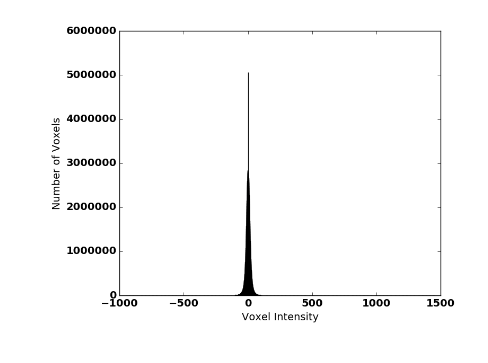

In [75]:
hist=mpimg.imread('overall/NKI_0021001_1_rest_hist.png')

fhist = plt.figure(figsize=(12, 8))

axhist = fhist.add_subplot(1, 2, 1)
axhist.imshow(hist)
axhist.axis('off')
fintens.show()

Finally, we produce a summary file with some useful information about the general dataset, the scan itself (ie, number of voxels, resolution of the scan, etc) and several other metrics. Particularly of importance, we put summary information about our motion parameter regression here. Things to look at are numbers of time points with movements over .1 mm (not ideal) and over .5 mm (bad). Many people will remove time points with movements over particular thresholds, however, for now we have held that out of the pipeline as we have found it decreases mnr significantly (for a preprint of the paper where we demonstrate, please contact an administrator of this repository until the paper's release). If a scan has too many points with significant head movements, it may be best to leave the scan out of any post processing analyses. 